<a href="https://colab.research.google.com/github/SkullBanger77/Loan-Prediction-with-Tensorflow/blob/main/loan_predictor_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading required pacakages
import numpy as np 
import pandas as pd 

In [3]:
#Loading the data
loan_data = pd.read_csv("Loan_Prediction.csv")
type(loan_data)
loan_data.shape

(614, 13)

In [4]:
#Reading the data
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#Understanding the data
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#Counting missing values
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Dropping the missing values
loan_data = loan_data.dropna()

In [8]:
#Check for missing values
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
#Rows left
loan_data.shape

(480, 13)

In [10]:
#Labelling categorical data
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [11]:
#Replacing categories with numbers
loan_data.replace({"Married":{"Yes":1,"No":0},"Loan_Status":{'Y':1,'N':0},"Dependents":{"3+":4},"Education":{"Graduate":1,"Not Graduate":0}, "Property_Area":{"Rural":0,"Urban":1,"Semiurban":2}, "Self_Employed":{"No":0,"Yes":1}, "Gender":{"Male":1,"Female":0}}, inplace=True)

In [12]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [13]:
#Exploring categories
loan_data["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<Axes: xlabel='Self_Employed', ylabel='count'>

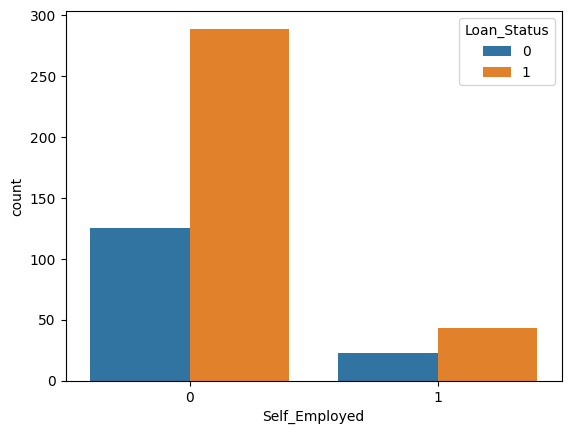

In [14]:
#Graphing categories
import seaborn as sns
sns.countplot(data=loan_data, x="Self_Employed", hue="Loan_Status")

In [15]:
#Splitting data and labels
X = loan_data.drop(columns=["Loan_ID","Loan_Status","Loan_Amount_Term","CoapplicantIncome"],axis=1)
Y = loan_data["Loan_Status"]
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     LoanAmount  Credit_History  Property_Area  
1         128.

In [16]:
#Splitting training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, stratify=Y, random_state=2)

In [17]:
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')

In [18]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 4s 12ms/step - loss: 19.0175 - accuracy: 0.5417 - precision: 0.6836 - recall: 0.6288
Epoch 2/100
14/14 [==============================] - 0s 13ms/step - loss: 4.5563 - accuracy: 0.5764 - precision: 0.6946 - recall: 0.6923
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 2.3715 - accuracy: 0.5324 - precision: 0.7012 - recall: 0.5652
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 1.5451 - accuracy: 0.5671 - precision: 0.6918 - recall: 0.6756
Epoch 5/100
14/14 [==============================] - 0s 8ms/step - loss: 1.9590 - accuracy: 0.5208 - precision: 0.6855 - recall: 0.5686
Epoch 6/100
14/14 [==============================] - 0s 12ms/step - loss: 1.7433 - accuracy: 0.5787 - precision: 0.7082 - recall: 0.6656
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 4.0058 - accuracy: 0.6134 - precision: 0.7185 - recall: 0.7258
Epoch 8/100
14/14 [=========================

In [19]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [20]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [21]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, prediction_classes))

[[ 2 13]
 [ 3 30]]


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(Y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(Y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(Y_test, prediction_classes):.2f}')

Accuracy: 0.67
Precision: 0.70
Recall: 0.91
